for MINIST DATASET

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [14]:
# Load MNIST from OpenML
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Convert labels to integers
y = y.astype(int)

# Use only 20,000 samples (as in the paper)
X = X[:20000]
y = y[:20000]

print(X.shape)   # (20000, 784)


(20000, 784)


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print("Explained variance by PC1:", pca_2d.explained_variance_ratio_[0])
print("Explained variance by PC2:", pca_2d.explained_variance_ratio_[1])
print("Total (2 PCs):", np.sum(pca_2d.explained_variance_ratio_))


Explained variance by PC1: 0.05817755735998891
Explained variance by PC2: 0.042984304586406966
Total (2 PCs): 0.10116186194639587


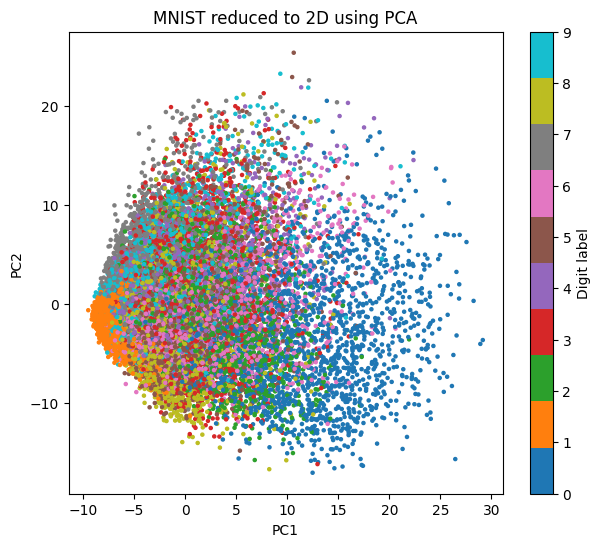

In [17]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='tab10', s=5)
plt.colorbar(label="Digit label")
plt.title("MNIST reduced to 2D using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


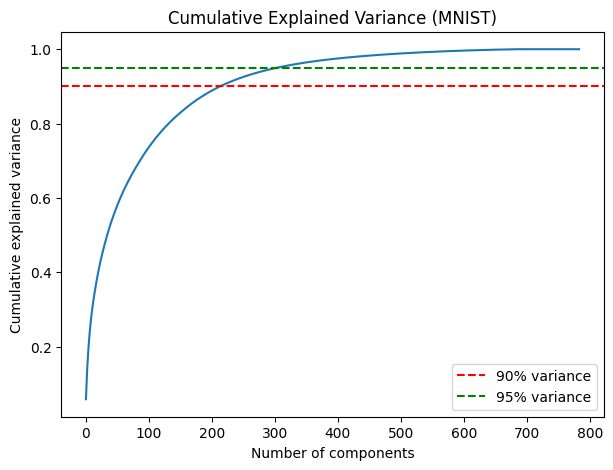

In [18]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.plot(cumulative_variance)
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.legend()
plt.title("Cumulative Explained Variance (MNIST)")
plt.show()


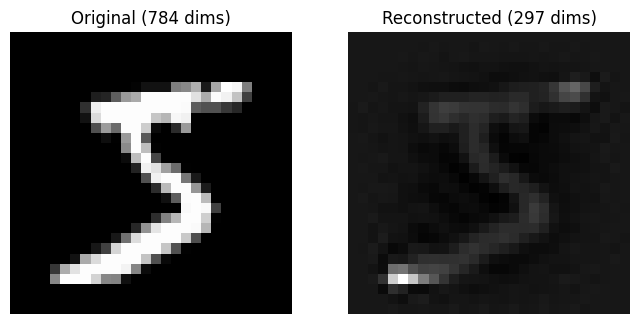

In [19]:
pca_297 = PCA(n_components=297, random_state=42)
X_pca_297 = pca_297.fit_transform(X_scaled)
X_reconstructed = pca_297.inverse_transform(X_pca_297)

# Plot original vs reconstructed image
idx = 0  # any digit
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(X[idx].reshape(28,28), cmap='gray')
plt.title("Original (784 dims)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(X_reconstructed[idx].reshape(28,28), cmap='gray')
plt.title("Reconstructed (297 dims)")
plt.axis('off')

plt.show()


In [20]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,
    random_state=42,
    init='random'
)

X_tsne = tsne.fit_transform(X_scaled)


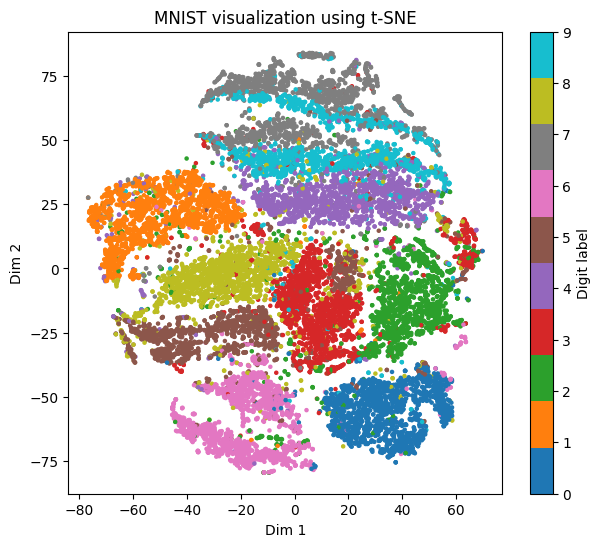

In [21]:
plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='tab10', s=5)
plt.colorbar(label="Digit label")
plt.title("MNIST visualization using t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()
